In [1]:
# Importing the dependecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#### Problem Statement

To evaluate the user if they will default or not in future is important. Same needed to automate the process, so we need to
make an algorithm which will evaluate on the basis of customer education, previous history, cibil score, bank statement, 
responsibilities, company growth and history.

In [2]:
dataset = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#number of rows and columns

In [6]:
dataset.shape

(614, 13)

In [7]:
# statistical measure
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# missing values analysis
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
614*0.85

521.9

In [10]:
614-522

92

In [11]:
dataset_without_nan = dataset.dropna()

In [12]:
dataset_without_nan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
dataset_without_nan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
dataset_without_nan = dataset_without_nan.drop_duplicates()

In [15]:
dataset_without_nan.shape

(480, 13)

In [16]:
# label encoding

In [17]:
dataset_without_nan.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [18]:
dataset_without_nan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [19]:
dataset_without_nan.replace({"Gender":{'Male':0,'Female':1}},inplace=True)

In [20]:
dataset_without_nan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [21]:
dataset_without_nan.replace({"Education":{'Not Graduate':0,'Graduate':1},"Married":{'No':0,'Yes':1}},inplace=True)

In [22]:
dataset_without_nan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,0,1,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [23]:
dataset_without_nan.replace({"Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [24]:
dataset_without_nan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [25]:
dataset_without_nan.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.179167,0.647917,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [26]:
dataset_without_nan['Gender'].value_counts()

0    394
1     86
Name: Gender, dtype: int64

In [27]:
dataset_without_nan.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
dataset_without_nan['Married'].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [29]:
dataset_without_nan['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [30]:
dataset_without_nan['Education'].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [31]:
dataset_without_nan['Self_Employed'].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [32]:
dataset_without_nan['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [33]:
dataset_without_nan['Property_Area'].value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

In [34]:
dataset_without_nan['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [35]:
dataset_without_nan.replace({'Dependents':{'3+':4}},inplace=True)

In [36]:
dataset_without_nan['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [37]:
dataset_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 52.5+ KB


In [39]:
dataset_without_nan.replace({"Dependents":{'0':0,'1':1,'2':2,'4':4}},inplace=True)

In [40]:
dataset_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 52.5+ KB


In [41]:
# Data visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

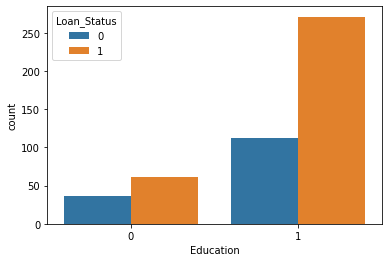

In [42]:
sns.countplot(x='Education',hue='Loan_Status',data=dataset_without_nan)

<AxesSubplot:xlabel='Married', ylabel='count'>

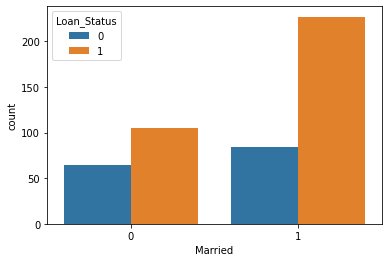

In [43]:
sns.countplot(x='Married',hue='Loan_Status',data=dataset_without_nan)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

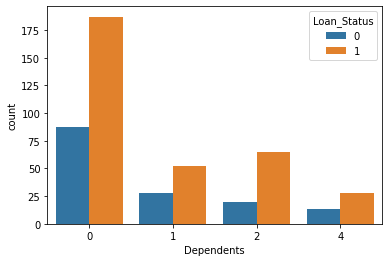

In [44]:
sns.countplot(x='Dependents',hue='Loan_Status',data=dataset_without_nan)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

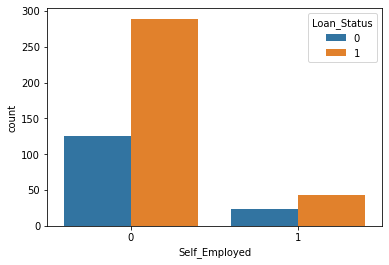

In [45]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=dataset_without_nan)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

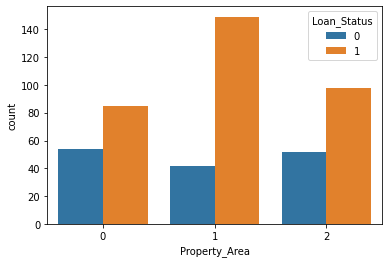

In [46]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=dataset_without_nan)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

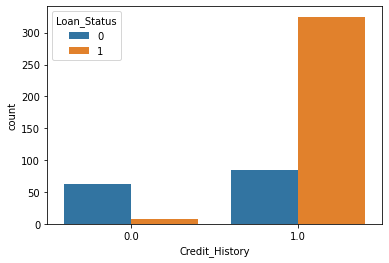

In [47]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=dataset_without_nan)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

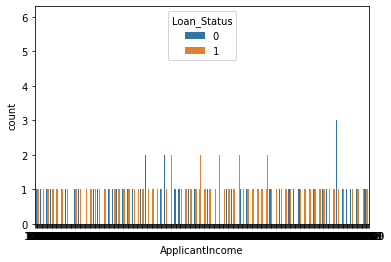

In [48]:
sns.countplot(x='ApplicantIncome',hue='Loan_Status',data=dataset_without_nan)

Seperating data by dependent and independent values

In [50]:
x=dataset_without_nan.drop(columns = ['Loan_ID','Loan_Status'])
y=dataset_without_nan['Loan_Status']

In [51]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [58]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

Train test split


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [61]:
x_train.shape

(432, 11)

In [62]:
x_test.shape

(48, 11)

In [63]:
y_train.shape

(432,)

In [64]:
y_test.shape

(48,)

Training the model with the help of Support vector machine (SVM)

In [66]:
classifier=svm.SVC(kernel='linear')


In [67]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

Model evaluation

In [74]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [75]:
print("Training accuracy is ",training_data_accuracy)

Training accuracy is  0.7476851851851852


In [76]:
x_test_prediction = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [77]:
print("Testing accuracy is ",testing_data_accuracy)

Testing accuracy is  0.8333333333333334


Making a prediction on new data

In [98]:
# input_data=(0,1,0,1,1,54505,54500,100,20,1,2)
input_data=(2,0,2,0,1,54,1,53,20,1,2)

# changing input data to numpy array
input_data_array = np.asarray(input_data)
# reshape the array as predicting for one instance
input_data_reshape = input_data_array.reshape(1,-1)
#standardizing the data
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# std_data = scaler.transform(input_data_reshape)
print(input_data_reshape)
prediction = classifier.predict(input_data_reshape)
print(prediction)

if prediction[0]== 0:
    print("Gets a loan")
else:
    print("No loan")

[[ 2  0  2  0  1 54  1 53 20  1  2]]
[0]
Gets a loan


C:\Users\Rachit Pahwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [78]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
